In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [552]:
df_diabetes = pd.read_csv('.\\data\\diabetic_data.csv')

In [553]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### ANALISIS DE NULOS

In [554]:
nulos = df_diabetes['max_glu_serum'].isnull().sum()
nulos = nulos.astype('int64')
no_nulos = 101765 - nulos

print(f"La cantidad de nulos es: {nulos}")
print(f"La cantidad de no nulos es: {no_nulos}")
print(f"El porcentaje de nulos es {round(nulos / 101765 * 100 , 2)} %")

La cantidad de nulos es: 96420
La cantidad de no nulos es: 5345
El porcentaje de nulos es 94.75 %


In [555]:
null_count = df_diabetes.isnull().sum()

null_percentage = (df_diabetes.isnull().mean()) * 100

null_info = pd.DataFrame({'Col': null_count.index, 'Cant_Nulos': null_count, 'Share_nulos': null_percentage})
null_info

,Col,Cant_Nulos,Share_nulos
encounter_id,encounter_id,0,0.000000
patient_nbr,patient_nbr,0,0.000000
race,race,0,0.000000
gender,gender,0,0.000000
age,age,0,0.000000
weight,weight,0,0.000000
admission_type_id,admission_type_id,0,0.000000
discharge_disposition_id,discharge_disposition_id,0,0.000000
admission_source_id,admission_source_id,0,0.000000
time_in_hospital,time_in_hospital,0,0.000000


In [556]:
df_diabetes['max_glu_serum'].describe()

count     5346
unique       3
top       Norm
freq      2597
Name: max_glu_serum, dtype: object

In [557]:
df_diabetes['A1Cresult'].describe()

count     17018
unique        3
top          >8
freq       8216
Name: A1Cresult, dtype: object

In [558]:
null_info[null_info['Share_nulos']>=80].sort_values(by='Share_nulos', ascending=False)

,Col,Cant_Nulos,Share_nulos
max_glu_serum,max_glu_serum,96420,94.746772
A1Cresult,A1Cresult,84748,83.277322


In [559]:
cols_eliminar=null_info[null_info['Share_nulos']>=80]['Col'].to_list()

In [560]:
df_diabetes=df_diabetes.drop(cols_eliminar, axis=1)

Se toma la decisión de eliminar las columnas que presentan más de 80% de registros nulos

#### VARIABLES NUMERICAS

In [561]:
var_numericas = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 
                    'number_inpatient', 'number_diagnoses']

#### VARIABLES CATEGORICAS

In [562]:
var_persona = ['race', 'gender', 'age', 'weight']
var_medicas = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code',
                    'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
var_medicine = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
                'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
                'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                'metformin-rosiglitazone', 'metformin-pioglitazone''change', 'diabetesMed']


#### Tratamiento de mising values

In [563]:
df_diabetes['race'].value_counts(normalize=True)

race
Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: proportion, dtype: float64

In [564]:
df_diabetes.loc[df_diabetes['race'] == '?', 'race'] = 'Caucasian'

In [565]:
df_diabetes['race'].value_counts(normalize=True)

race
Caucasian          0.770120
AfricanAmerican    0.188766
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: proportion, dtype: float64

'race' : Se decide adjudicar los valores de mising values a la variable 'caucasian' ya que representa el 75% de los datos.

In [566]:
df_diabetes['weight'].value_counts(normalize=True)

weight
?            0.968585
[75-100)     0.013128
[50-75)      0.008814
[100-125)    0.006142
[125-150)    0.001425
[25-50)      0.000953
[0-25)       0.000472
[150-175)    0.000344
[175-200)    0.000108
>200         0.000029
Name: proportion, dtype: float64

In [567]:
df_diabetes = df_diabetes.drop(['weight'],axis=1)

'weight' : Se elimina la columna 'weight' porque el 97% de los datos son missing values.

In [568]:
df_diabetes['payer_code'].value_counts(normalize=True)

payer_code
?     0.395574
MC    0.318761
HM    0.061651
SP    0.049201
BC    0.045742
MD    0.034707
CP    0.024890
UN    0.024055
CM    0.019034
OG    0.010151
PO    0.005817
DM    0.005395
CH    0.001435
WC    0.001327
OT    0.000934
MP    0.000776
SI    0.000540
FR    0.000010
Name: proportion, dtype: float64

In [569]:
df_diabetes = df_diabetes.drop(['payer_code'],axis=1)

'payer_code' : Se elimina la columna 'payer_code' porque el 40% de los datos son missing values.

In [570]:
df_diabetes['medical_specialty'].value_counts(normalize=True)

medical_specialty
?                                0.490822
InternalMedicine                 0.143810
Emergency/Trauma                 0.074337
Family/GeneralPractice           0.073109
Cardiology                       0.052591
                                   ...   
SportsMedicine                   0.000010
Speech                           0.000010
Perinatology                     0.000010
Neurophysiology                  0.000010
Pediatrics-InfectiousDiseases    0.000010
Name: proportion, Length: 73, dtype: float64

In [571]:
df_diabetes = df_diabetes.drop(['medical_specialty'],axis=1)

'medical_specialty' : Se elimina la columna 'medical_specialty' porque el 49% de los datos son missing values.

In [572]:
df_diabetes['diag_1'].value_counts(normalize=False)

diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: count, Length: 717, dtype: int64

In [573]:
conteo_diag_1 = df_diabetes['diag_1'].value_counts()

conteo_diag_1_filtrado = conteo_diag_1[conteo_diag_1 <= 5]

cantidad_total = conteo_diag_1_filtrado.sum()

print(f"La cantidad total de registros con 5 o menos apariciones es: {cantidad_total}")
print(f"El porcentaje sobre el total de datos es: {cantidad_total /  len(df_diabetes)}")

La cantidad total de registros con 5 o menos apariciones es: 612
El porcentaje sobre el total de datos es: 0.006013796356346914


In [574]:
registros_a_eliminar = conteo_diag_1_filtrado.index

df_diabetes = df_diabetes[~df_diabetes['diag_1'].isin(registros_a_eliminar)]

In [575]:
missing_count_diag1 = df_diabetes['diag_1'].eq('?').sum()

print(f"Cantidad de valores missing en 'diag_1': {missing_count_diag1}")

Cantidad de valores missing en 'diag_1': 21


*Se decide quitar los registros con 5 o menos ocurrencias.*

In [576]:
df_diabetes = df_diabetes[df_diabetes['diag_1'] != '?']

*'diag_1' : Se eliminan las filas de la columna 'diag_1' que contienen el valor "?" ya que solamente son 21.*

In [577]:
df_diabetes['diag_2'].value_counts(normalize=False)

diag_2
276     6712
428     6642
250     6037
427     5023
401     3715
        ... 
35         1
605        1
832        1
E854       1
927        1
Name: count, Length: 739, dtype: int64

In [578]:
conteo_diag_2 = df_diabetes['diag_2'].value_counts()

conteo_diag_2_filtrado = conteo_diag_2[conteo_diag_2 <= 5]

cantidad_total = conteo_diag_2_filtrado.sum()

print(f"La cantidad total de registros con 5 o menos apariciones es: {cantidad_total}")
print(f"El porcentaje sobre el total de datos es: {cantidad_total /  len(df_diabetes)}")

La cantidad total de registros con 5 o menos apariciones es: 636
El porcentaje sobre el total de datos es: 0.0062887484797247185


In [579]:
registros_a_eliminar = conteo_diag_2_filtrado.index

df_diabetes = df_diabetes[~df_diabetes['diag_2'].isin(registros_a_eliminar)]

*Se decide quitar los registros con 5 o menos ocurrencias.*

In [580]:
missing_count_diag2 = df_diabetes['diag_2'].eq('?').sum()

print(f"Cantidad de valores missing en 'diag_2': {missing_count_diag2}")

Cantidad de valores missing en 'diag_2': 355


In [581]:
df_diabetes = df_diabetes[df_diabetes['diag_2'] != '?']

*'diag_2' : Se eliminan las filas de la columna 'diag_2' que contienen el valor "?" ya que solamente son 357 (menos de un 0,5% del total de los datos).*

In [582]:
df_diabetes['diag_3'].value_counts(normalize=True)

diag_3
250     0.113229
401     0.081774
276     0.051247
428     0.045356
427     0.039274
          ...   
542     0.000010
374     0.000010
E882    0.000010
E822    0.000010
971     0.000010
Name: proportion, Length: 773, dtype: float64

In [583]:
conteo_diag_3 = df_diabetes['diag_3'].value_counts()

conteo_diag_3_filtrado = conteo_diag_3[conteo_diag_3 <= 5]

cantidad_total = conteo_diag_3_filtrado.sum()

print(f"La cantidad total de registros con 5 o menos apariciones es: {cantidad_total}")
print(f"El porcentaje sobre el total de datos es: {cantidad_total /  len(df_diabetes)}")

La cantidad total de registros con 5 o menos apariciones es: 712
El porcentaje sobre el total de datos es: 0.007109903936410297


In [584]:
registros_a_eliminar = conteo_diag_3_filtrado.index

df_diabetes = df_diabetes[~df_diabetes['diag_3'].isin(registros_a_eliminar)]

In [585]:
missing_count_diag3 = df_diabetes['diag_3'].eq('?').sum()

print(f"Cantidad de valores missing en 'diag_3': {missing_count_diag3}")

Cantidad de valores missing en 'diag_3': 1119


In [586]:
numero = int(len(df_diabetes))
percentage = missing_count_diag3 / numero
percentage

0.01125414864728955

In [587]:
df_diabetes = df_diabetes[df_diabetes['diag_3'] != '?']

'diag_3' : Se eliminan las filas de la columna 'diag_3' que contienen el valor "?" ya que solamente son 1144 (1% del total de los datos).

##### VARIABLES QUITADAS DEL MODELO:

- 'max_glu_serum'
- 'A1Cresult'
- 'weight'
- 'payer_code'
- 'medical_specialty'

In [588]:
# Analisis de variables numericas

df_diabetes[var_numericas].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,98311.000000,98311.000000,98311.000000,98311.000000,98311.000000,98311.000000,98311.000000,98311.000000
mean,4.425568,43.238142,1.352331,16.145935,0.373478,0.199449,0.643600,7.502334
std,2.992649,19.683920,1.715000,8.120647,1.277227,0.932583,1.267122,1.837153
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#### TARGET

In [589]:
readmitted_unique = df_diabetes['readmitted'].unique()
print(readmitted_unique)

['>30' 'NO' '<30']


In [590]:
readmitted_mapping = {'NO': 1, '>30': 2, '<30': 3}
df_diabetes['readmitted_mapped'] = df_diabetes['readmitted'].map(readmitted_mapping)

Se decide mapear la variable objetivo

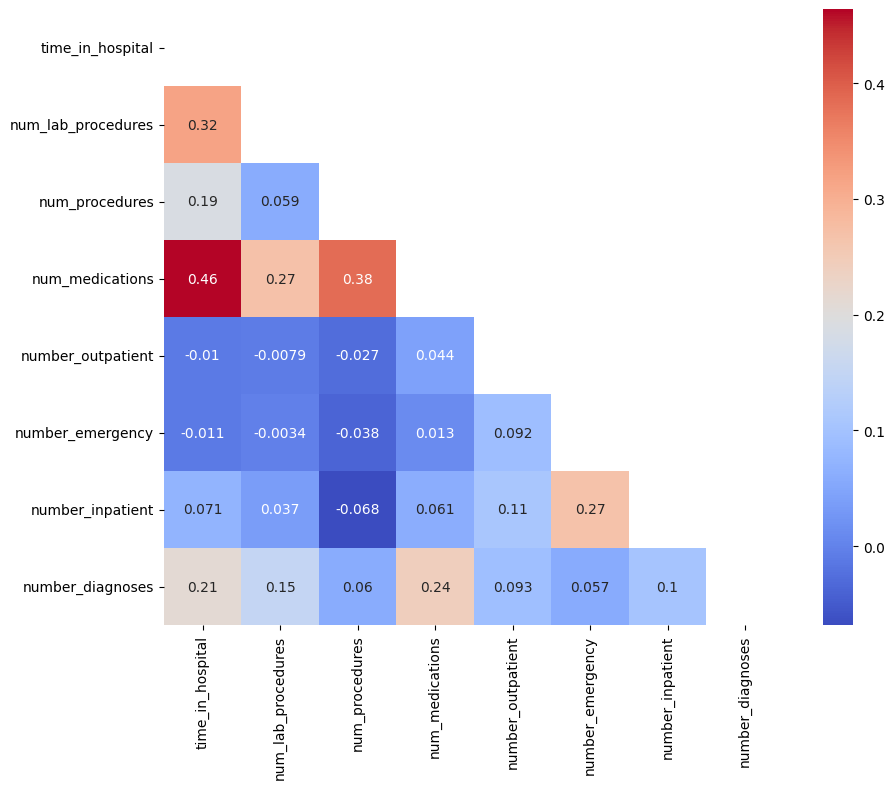

In [591]:
corr = df_diabetes[var_numericas].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax, mask=mask)
plt.show()

Se genera matriz de correlación para determinar si existen relaciones altas entre variables numericas.
Se detecta que hay una correlación de 0.47 entre "num_medications" y "time_in_hospital" pero se decide avanzar con ambas variables. Se tendrá en cuenta este hecho en caso de que afecte a la performance del modelo.

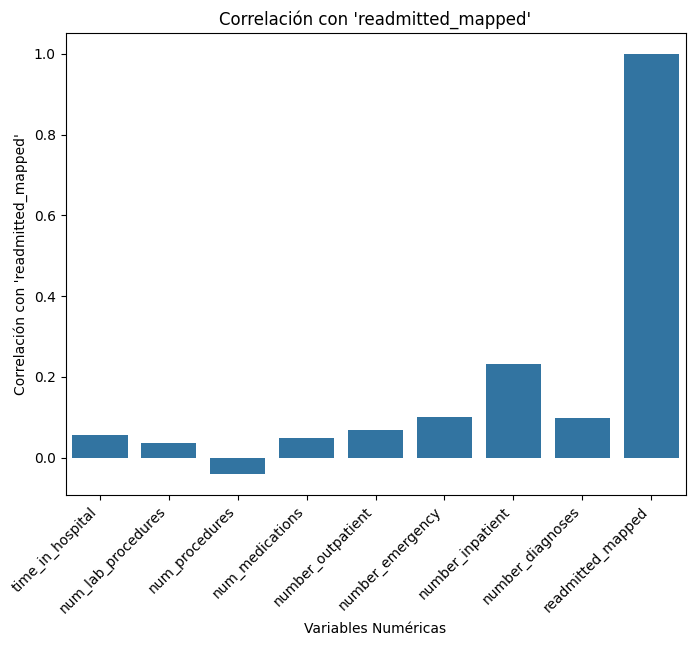

In [592]:
df_numeric = df_diabetes[var_numericas].select_dtypes(include=['int64', 'float64'])
df_numeric['readmitted_mapped'] = df_diabetes['readmitted_mapped']
correlation_with_readmitted = df_numeric.corr()['readmitted_mapped']

correlation_with_readmitted = df_numeric.corr()['readmitted_mapped']

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_readmitted.index, y=correlation_with_readmitted.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Variables Numéricas")
plt.ylabel("Correlación con 'readmitted_mapped'")
plt.title("Correlación con 'readmitted_mapped'")
plt.show()

In [593]:
sorted_correlation = correlation_with_readmitted.sort_values(ascending=False)

print("Correlación con 'readmitted_mapped' (ordenadas de mayor a menor):")
print(sorted_correlation)

Correlación con 'readmitted_mapped' (ordenadas de mayor a menor):
readmitted_mapped     1.000000
number_inpatient      0.232068
number_emergency      0.101431
number_diagnoses      0.098740
number_outpatient     0.067614
time_in_hospital      0.054771
num_medications       0.047581
num_lab_procedures    0.035339
num_procedures       -0.040401
Name: readmitted_mapped, dtype: float64


Se analiza que variables numericas tienen mas correlacion con la variable a predecir.

### VARIABLES CATEGORICAS

##### Analisis *var_persona*

In [594]:
var_persona = ['race', 'gender', 'age']

In [595]:
df_diabetes['race'].value_counts(normalize=True)

race
Caucasian          0.770809
AfricanAmerican    0.188626
Hispanic           0.019560
Other              0.014800
Asian              0.006205
Name: proportion, dtype: float64

In [596]:
df_diabetes['gender'].value_counts(normalize=True)

gender
Female             0.537397
Male               0.462583
Unknown/Invalid    0.000020
Name: proportion, dtype: float64

In [597]:
count_unknown_invalid = df_diabetes['gender'].value_counts().get('Unknown/Invalid', 0)
print(count_unknown_invalid)

2


Se elimina la row 'Unknown/Invalid' ya que no aporta información y son solamente 3 datos.

In [598]:
df_diabetes = df_diabetes.drop(df_diabetes[df_diabetes['gender'] == 'Unknown/Invalid'].index)

In [599]:
df_diabetes['gender'].value_counts(normalize=True)

gender
Female    0.537408
Male      0.462592
Name: proportion, dtype: float64

In [600]:
df_diabetes['age'].value_counts(normalize=True)

age
[70-80)     0.259600
[60-70)     0.222991
[80-90)     0.171470
[50-60)     0.169801
[40-50)     0.093552
[30-40)     0.035368
[90-100)    0.028014
[20-30)     0.014353
[10-20)     0.004282
[0-10)      0.000570
Name: proportion, dtype: float64

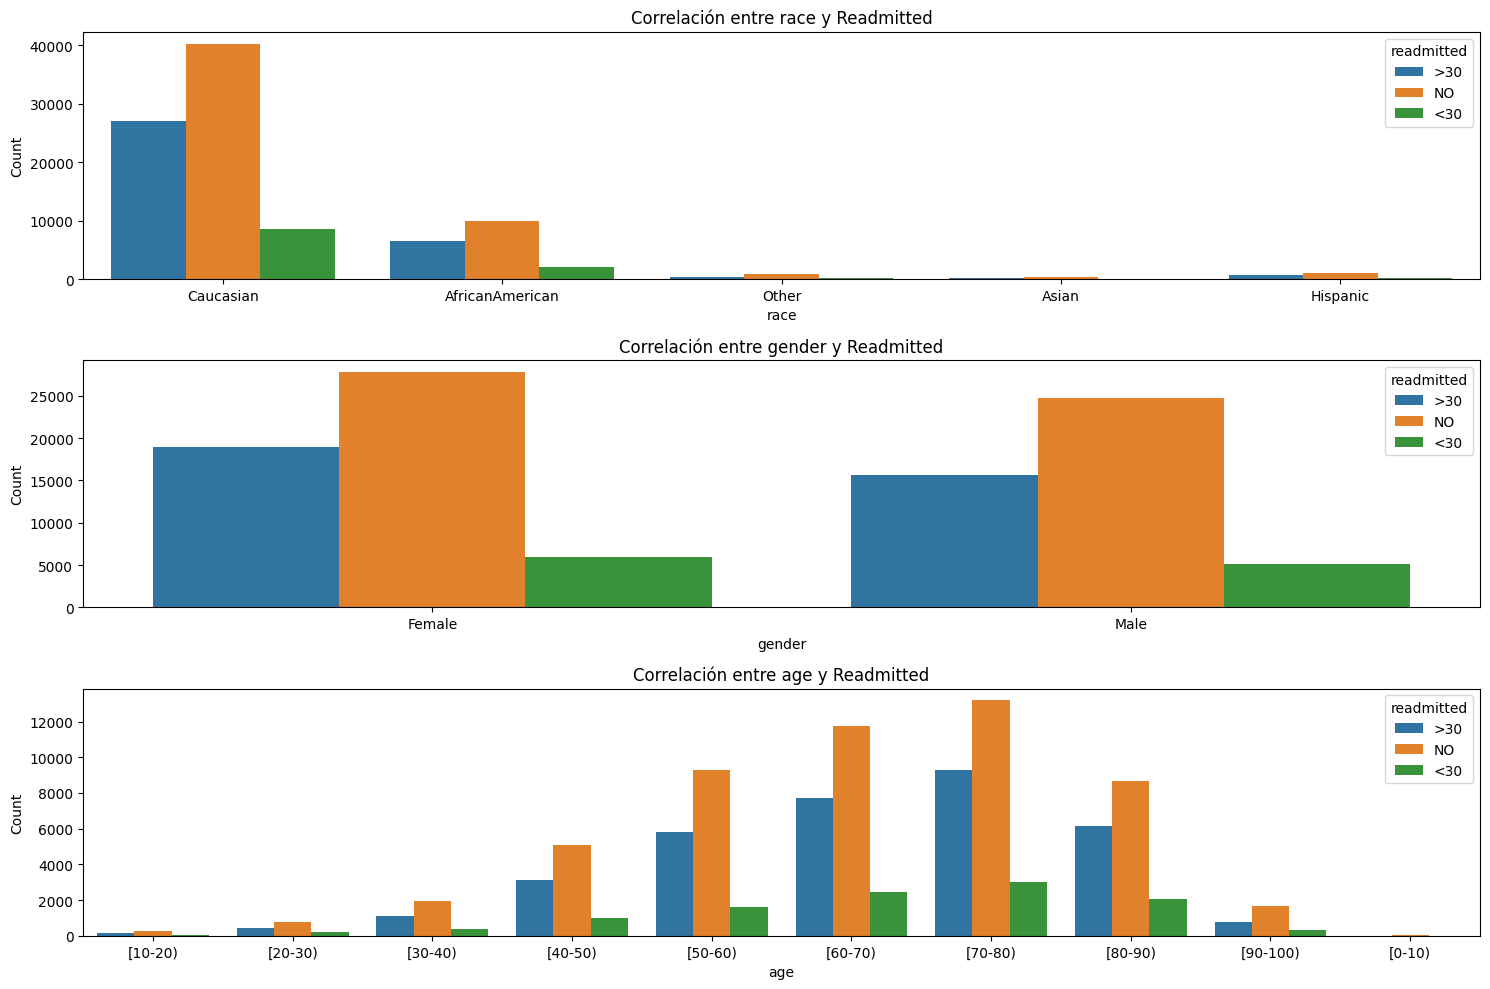

In [601]:
plt.figure(figsize=(15, 10))

for var in var_persona:
    plt.subplot(3, 1, var_persona.index(var) + 1)
    sns.countplot(x=var, hue='readmitted', data=df_diabetes, dodge=True)  # Ajuste: dodge=True
    plt.title(f'Correlación entre {var} y Readmitted')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### Analisis *var_medicas*

In [602]:
var_medicas = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3']

In [603]:
df_diabetes['admission_type_id'].value_counts(normalize=True)

admission_type_id
1    0.532047
3    0.183920
2    0.181550
6    0.051928
5    0.047198
8    0.003123
7    0.000153
4    0.000081
Name: proportion, dtype: float64

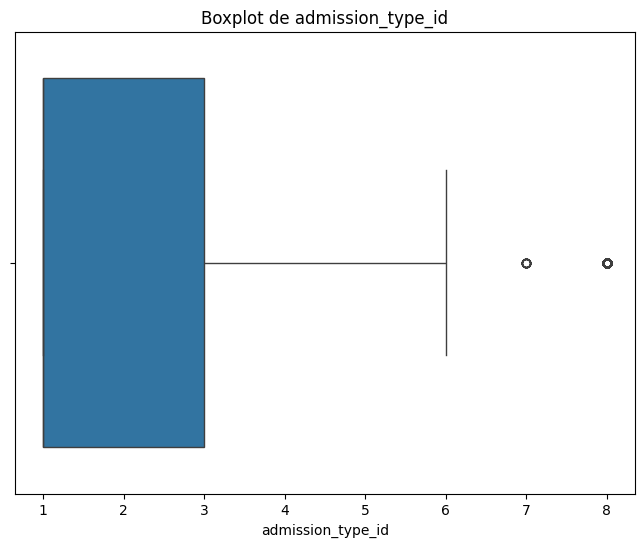

In [604]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_diabetes['admission_type_id'])
plt.title('Boxplot de admission_type_id')
plt.show()

Q1 = df_diabetes['admission_type_id'].quantile(0.25)
Q3 = df_diabetes['admission_type_id'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_diabetes[(df_diabetes['admission_type_id'] < lower_limit) | (df_diabetes['admission_type_id'] > upper_limit)]

In [605]:
df_diabetes = df_diabetes.drop(df_diabetes[df_diabetes['admission_type_id'] == 7].index)
df_diabetes = df_diabetes.drop(df_diabetes[df_diabetes['admission_type_id'] == 4].index)

*Se decide eliminar los outliers de la variable 'admission_type_id'*


*Al quitar el outlier "8" el modelo performa peor, por lo cual se decide mantenerlo.*

In [606]:
df_diabetes['discharge_disposition_id'].value_counts(normalize=True)

discharge_disposition_id
1     0.587357
3     0.139023
6     0.128380
18    0.036557
2     0.021193
22    0.019728
11    0.016442
5     0.011619
25    0.009533
4     0.008119
7     0.006044
23    0.004090
13    0.003958
14    0.003724
28    0.001404
8     0.001038
15    0.000631
24    0.000478
9     0.000203
17    0.000142
16    0.000112
10    0.000061
19    0.000061
27    0.000051
12    0.000031
20    0.000020
Name: proportion, dtype: float64

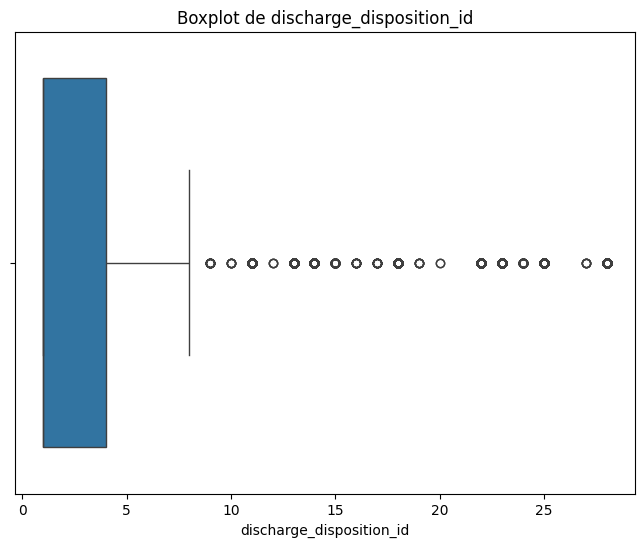

In [607]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_diabetes['discharge_disposition_id'])
plt.title('Boxplot de discharge_disposition_id')
plt.show()

Q1 = df_diabetes['discharge_disposition_id'].quantile(0.25)
Q3 = df_diabetes['discharge_disposition_id'].quantile(0.85)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_diabetes[(df_diabetes['discharge_disposition_id'] < lower_limit) | (df_diabetes['discharge_disposition_id'] > upper_limit)]

In [608]:
outliers.shape[0]

7522

Se dan de baja las variables con menos de 0.1% de ocurrencia

In [609]:
values_to_drop = df_diabetes['discharge_disposition_id'].value_counts(normalize=True)[df_diabetes['discharge_disposition_id'].value_counts(normalize=True) < 0.001].index

df_diabetes = df_diabetes[~df_diabetes['discharge_disposition_id'].isin(values_to_drop)]


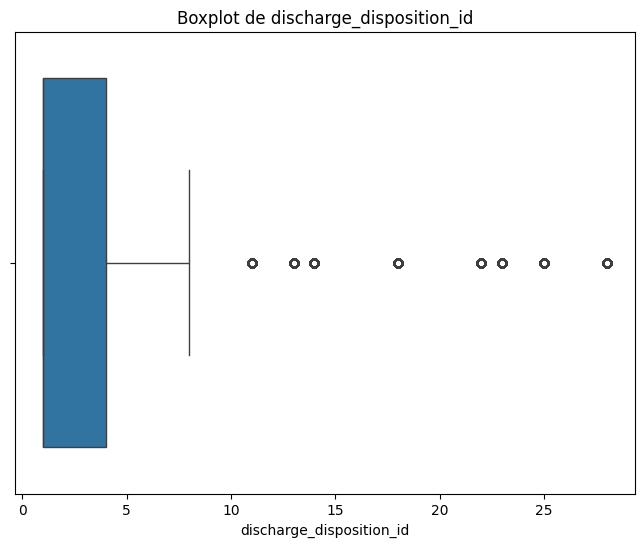

In [610]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_diabetes['discharge_disposition_id'])
plt.title('Boxplot de discharge_disposition_id')
plt.show()

Q1 = df_diabetes['discharge_disposition_id'].quantile(0.25)
Q3 = df_diabetes['discharge_disposition_id'].quantile(0.85)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_diabetes[(df_diabetes['discharge_disposition_id'] < lower_limit) | (df_diabetes['discharge_disposition_id'] > upper_limit)]

In [611]:
outliers.shape[0]

7375

In [612]:
df_diabetes['admission_source_id'].value_counts(normalize=True)

admission_source_id
7     0.567863
1     0.287983
17    0.066752
4     0.031546
6     0.021557
2     0.010804
5     0.008562
3     0.001794
20    0.001621
9     0.001111
8     0.000153
22    0.000112
10    0.000082
11    0.000020
25    0.000020
14    0.000010
13    0.000010
Name: proportion, dtype: float64

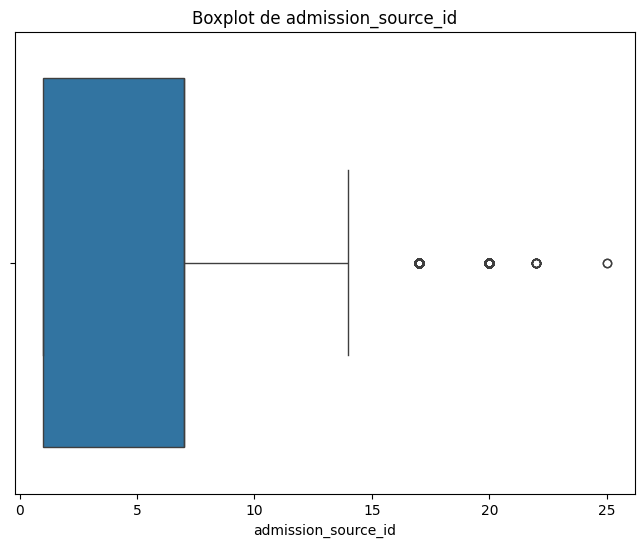

In [613]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_diabetes['admission_source_id'])
plt.title('Boxplot de admission_source_id')
plt.show()

Q1 = df_diabetes['admission_source_id'].quantile(0.25)
Q3 = df_diabetes['admission_source_id'].quantile(0.85)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers_adm = df_diabetes[(df_diabetes['admission_source_id'] < lower_limit) | (df_diabetes['admission_source_id'] > upper_limit)]

In [614]:
outliers_adm.shape[0]

6721

In [615]:
df_diabetes['diag_1'].value_counts(normalize=True)

diag_1
428    0.069514
414    0.066568
786    0.040241
410    0.036643
486    0.035307
         ...   
890    0.000041
272    0.000041
800    0.000041
864    0.000041
815    0.000031
Name: proportion, Length: 471, dtype: float64

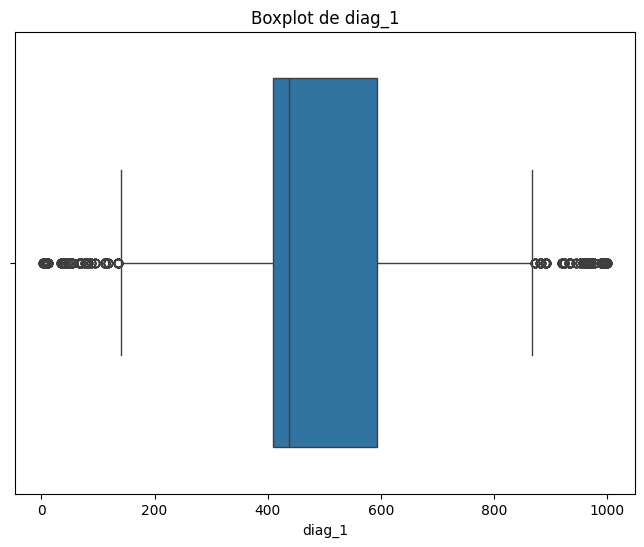

Valores atípicos de diag_1:
[]


In [616]:
df_diabetes_numeric = pd.DataFrame()
df_diabetes_numeric['diag_1'] = pd.to_numeric(df_diabetes['diag_1'], errors='coerce')


df_diabetes_numeric = df_diabetes_numeric.dropna(subset=['diag_1'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_diabetes_numeric['diag_1'])
plt.title('Boxplot de diag_1')
plt.show()

Q1 = df_diabetes_numeric['diag_1'].quantile(0.20)
Q3 = df_diabetes_numeric['diag_1'].quantile(0.80)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers_diag1 = df_diabetes_numeric[(df_diabetes_numeric['diag_1'] < lower_limit) | (df_diabetes_numeric['diag_1'] > upper_limit)]

print("Valores atípicos de diag_1:")
print(outliers_diag1['diag_1'].unique())

In [617]:
len(outliers_diag1)

0

In [618]:
df_diabetes['diag_2'].value_counts(normalize=True)

diag_2
428    0.067302
276    0.066385
250    0.056141
427    0.050668
401    0.037427
         ...   
969    0.000041
685    0.000041
864    0.000041
891    0.000031
V18    0.000020
Name: proportion, Length: 453, dtype: float64

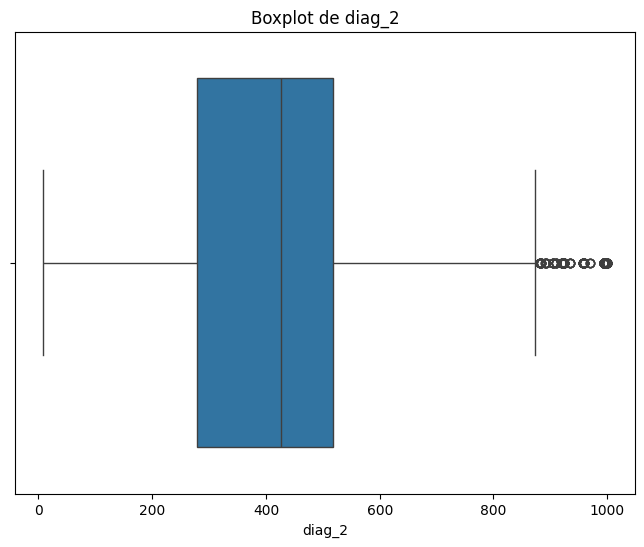

Valores atípicos de diag_2:
['440' '410' '428' '578' '250.6' '250.4' '250.32' '255' '997' '558' '599'
 '250.7' '402' '486' '414' '584' '682' '244' '250.03' '574' '577' '730'
 '786' '824' '562' '291' '276' '510' '401' '263' '434' '295' '438' '511'
 '427' '70' '722' '560' '182' '642' '491' '625' '571' '250.42' '250.13'
 '456' '518' '572' '575' '250.02' '820' '515' '780' '996' '235' '250.8'
 '250.82' '721' '787' '724' '282' '250.83' 'V55' '281' '250.33' '530'
 '466' '296' '250.12' '590' '715' 'V53' '593' '648' '566' '822' '191'
 '557' '432' '38' '435' '733' '403' '455' '482' '202' '493' '280' '225'
 '789' '154' '250.22' '441' '250.81' '962' '592' '707' '728' '618' '426'
 '569' '386' '337' '82' '531' '812' '596' '784' 'V58' '656' '433' '573'
 '492' '808' '958' '196' '112' '823' '532' '346' '162' '453' '535' '250'
 '595' '211' '303' '218' '782' '540' '189' '285' '198' '304' '157' '537'
 '250.31' '250.23' 'V57' '805' '507' '934' '376' '413' '807' '995' '153'
 '293' '626' '998' '553' '411' '4

In [619]:
df_diabetes_numeric['diag_2'] = pd.to_numeric(df_diabetes['diag_2'], errors='coerce')

df_diabetes_numeric = df_diabetes_numeric.dropna(subset=['diag_2'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_diabetes_numeric['diag_2'])
plt.title('Boxplot de diag_2')
plt.show()

Q1 = df_diabetes_numeric['diag_2'].quantile(0.20)
Q3 = df_diabetes_numeric['diag_2'].quantile(0.80)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers_diag2 = df_diabetes_numeric[(df_diabetes_numeric['diag_2'] < lower_limit) | (df_diabetes_numeric['diag_2'] > upper_limit)]

print("Valores atípicos de diag_2:")
print(outliers['diag_1'].unique())


In [620]:
len(outliers_diag2)

0

In [621]:
df_diabetes['diag_3'].value_counts(normalize=True)

diag_3
250    0.115371
401    0.083376
276    0.052197
428    0.046203
427    0.039976
         ...   
297    0.000061
239    0.000061
958    0.000061
965    0.000061
821    0.000051
Name: proportion, Length: 471, dtype: float64

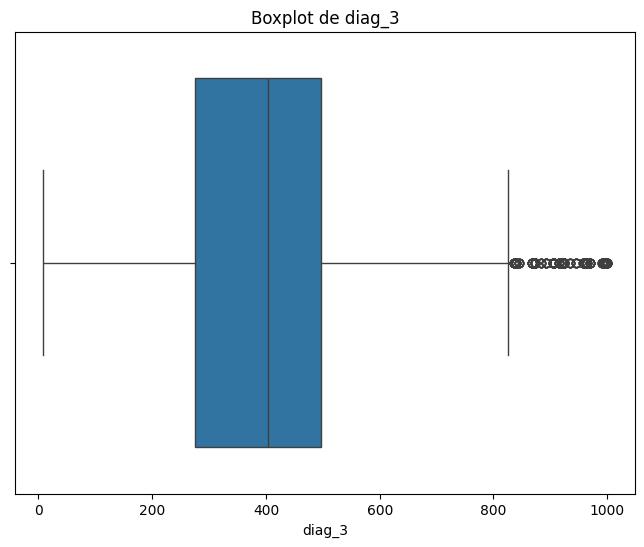

Valores atípicos de diag_3:
['440' '410' '428' '578' '250.6' '250.4' '250.32' '255' '997' '558' '599'
 '250.7' '402' '486' '414' '584' '682' '244' '250.03' '574' '577' '730'
 '786' '824' '562' '291' '276' '510' '401' '263' '434' '295' '438' '511'
 '427' '70' '722' '560' '182' '642' '491' '625' '571' '250.42' '250.13'
 '456' '518' '572' '575' '250.02' '820' '515' '780' '996' '235' '250.8'
 '250.82' '721' '787' '724' '282' '250.83' 'V55' '281' '250.33' '530'
 '466' '296' '250.12' '590' '715' 'V53' '593' '648' '566' '822' '191'
 '557' '432' '38' '435' '733' '403' '455' '482' '202' '493' '280' '225'
 '789' '154' '250.22' '441' '250.81' '962' '592' '707' '728' '618' '426'
 '569' '386' '337' '82' '531' '812' '596' '784' 'V58' '656' '433' '573'
 '492' '808' '958' '196' '112' '823' '532' '346' '162' '453' '535' '250'
 '595' '211' '303' '218' '782' '540' '189' '285' '198' '304' '157' '537'
 '250.31' '250.23' 'V57' '805' '507' '934' '376' '413' '807' '995' '153'
 '293' '626' '998' '553' '411' '4

In [622]:
df_diabetes_numeric['diag_3'] = pd.to_numeric(df_diabetes['diag_3'], errors='coerce')

df_diabetes_numeric = df_diabetes_numeric.dropna(subset=['diag_3'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_diabetes_numeric['diag_3'])
plt.title('Boxplot de diag_3')
plt.show()

Q1 = df_diabetes_numeric['diag_3'].quantile(0.20)
Q3 = df_diabetes_numeric['diag_3'].quantile(0.80)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers_diag3 = df_diabetes_numeric[(df_diabetes_numeric['diag_3'] < lower_limit) | (df_diabetes_numeric['diag_3'] > upper_limit)]

print("Valores atípicos de diag_3:")
print(outliers['diag_1'].unique())

In [623]:
len(outliers_diag3)

0

In [624]:
print(len(df_diabetes))

98110


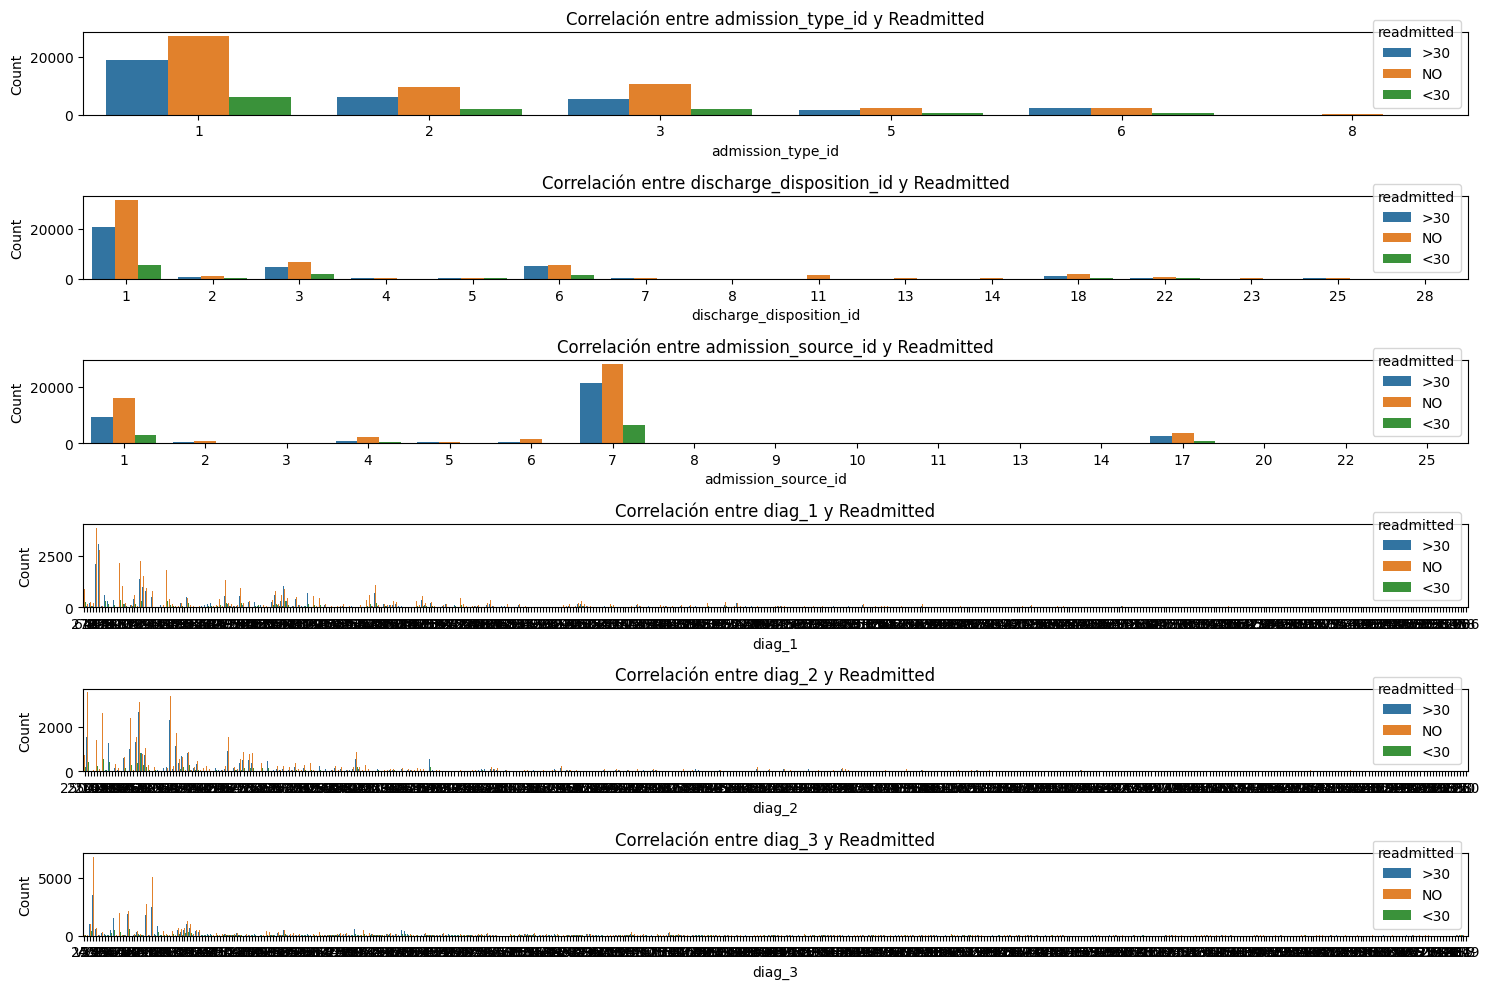

In [625]:
plt.figure(figsize=(15, 10))

for var in var_medicas:
    plt.subplot(6, 1, var_medicas.index(var) + 1)
    sns.countplot(x=var, hue='readmitted', data=df_diabetes, dodge=True)
    plt.title(f'Correlación entre {var} y Readmitted')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### Analisis *var_medicine*

In [626]:
var_medicine = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
                'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
                'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

In [627]:
df_diabetes['metformin'].value_counts(normalize=True)

metformin
No        0.804159
Steady    0.179819
Up        0.010417
Down      0.005606
Name: proportion, dtype: float64

In [628]:
df_diabetes['repaglinide'].value_counts(normalize=True)

repaglinide
No        0.984538
Steady    0.013923
Up        0.001080
Down      0.000459
Name: proportion, dtype: float64

In [629]:
df_diabetes['nateglinide'].value_counts(normalize=True)

nateglinide
No        0.993008
Steady    0.006656
Up        0.000224
Down      0.000112
Name: proportion, dtype: float64

In [630]:
df_diabetes['chlorpropamide'].value_counts(normalize=True)

chlorpropamide
No        0.999164
Steady    0.000764
Up        0.000061
Down      0.000010
Name: proportion, dtype: float64

In [631]:
df_diabetes['glimepiride'].value_counts(normalize=True)

glimepiride
No        0.948680
Steady    0.046142
Up        0.003241
Down      0.001937
Name: proportion, dtype: float64

In [632]:
df_diabetes['acetohexamide'].value_counts(normalize=True)

acetohexamide
No        0.99999
Steady    0.00001
Name: proportion, dtype: float64

In [633]:
df_diabetes['acetohexamide'].value_counts(normalize=False)

acetohexamide
No        98109
Steady        1
Name: count, dtype: int64

Se decide quitar la variable 'acetohexamide' por la naturaleza de sus datos.

In [634]:
df_diabetes = df_diabetes.drop(['acetohexamide'],axis=1)

In [635]:
df_diabetes['glipizide'].value_counts(normalize=True)

glipizide
No        0.874386
Steady    0.112343
Up        0.007634
Down      0.005637
Name: proportion, dtype: float64

In [636]:
df_diabetes['glyburide'].value_counts(normalize=True)

glyburide
No        0.894771
Steady    0.091591
Up        0.008042
Down      0.005596
Name: proportion, dtype: float64

In [637]:
df_diabetes['tolbutamide'].value_counts(normalize=False)

tolbutamide
No        98088
Steady       22
Name: count, dtype: int64

In [638]:
df_diabetes['pioglitazone'].value_counts(normalize=False)

pioglitazone
No        91006
Steady     6764
Up          225
Down        115
Name: count, dtype: int64

In [639]:
df_diabetes['rosiglitazone'].value_counts(normalize=False)

rosiglitazone
No        91928
Steady     5923
Up          173
Down         86
Name: count, dtype: int64

In [640]:
df_diabetes['acarbose'].value_counts(normalize=False)

acarbose
No        97811
Steady      286
Up           10
Down          3
Name: count, dtype: int64

In [641]:
df_diabetes['miglitol'].value_counts(normalize=False)

miglitol
No        98073
Steady       31
Down          4
Up            2
Name: count, dtype: int64

In [642]:
df_diabetes['troglitazone'].value_counts(normalize=False)

troglitazone
No        98107
Steady        3
Name: count, dtype: int64

In [643]:
df_diabetes['tolazamide'].value_counts(normalize=False)

tolazamide
No        98073
Steady       36
Up            1
Name: count, dtype: int64

In [644]:
df_diabetes['examide'].value_counts(normalize=False)

examide
No    98110
Name: count, dtype: int64

In [645]:
df_diabetes['citoglipton'].value_counts(normalize=False)

citoglipton
No    98110
Name: count, dtype: int64

In [646]:
df_diabetes['insulin'].value_counts(normalize=False)

insulin
No        45780
Steady    29598
Down      11817
Up        10915
Name: count, dtype: int64

In [647]:
df_diabetes['glyburide-metformin'].value_counts(normalize=False)

glyburide-metformin
No        97432
Steady      665
Up            7
Down          6
Name: count, dtype: int64

In [648]:
df_diabetes['glimepiride-pioglitazone'].value_counts(normalize=False)

glimepiride-pioglitazone
No        98109
Steady        1
Name: count, dtype: int64

In [649]:
df_diabetes['metformin-rosiglitazone'].value_counts(normalize=False)

metformin-rosiglitazone
No        98108
Steady        2
Name: count, dtype: int64

In [650]:
df_diabetes['metformin-pioglitazone'].value_counts(normalize=False)

metformin-pioglitazone
No        98109
Steady        1
Name: count, dtype: int64

In [651]:
df_diabetes['change'].value_counts(normalize=False)

change
No    52696
Ch    45414
Name: count, dtype: int64

In [652]:
df_diabetes['diabetesMed'].value_counts(normalize=False)

diabetesMed
Yes    75562
No     22548
Name: count, dtype: int64

In [653]:
print(len(var_medicine))

25


In [654]:
var_medicine1 = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
                'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose']
var_medicine2 = [ 'miglitol', 'troglitazone', 'tolazamide', 'examide',
                'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

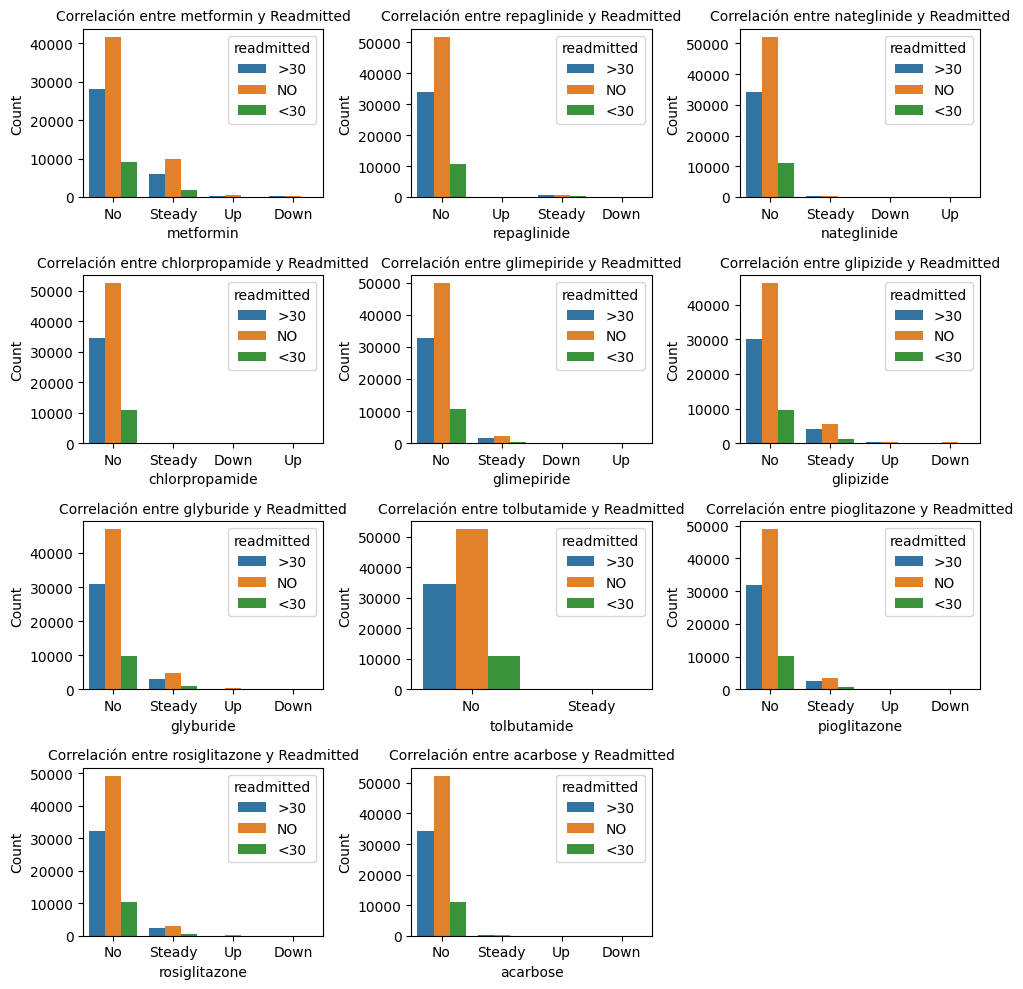

In [655]:
plt.figure(figsize=(10, 10))

for var in var_medicine1:
    plt.subplot(4, 3, var_medicine1.index(var) + 1)
    sns.countplot(x=var, hue='readmitted', data=df_diabetes, dodge=True)
    plt.title(f'Correlación entre {var} y Readmitted', fontsize=10)
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


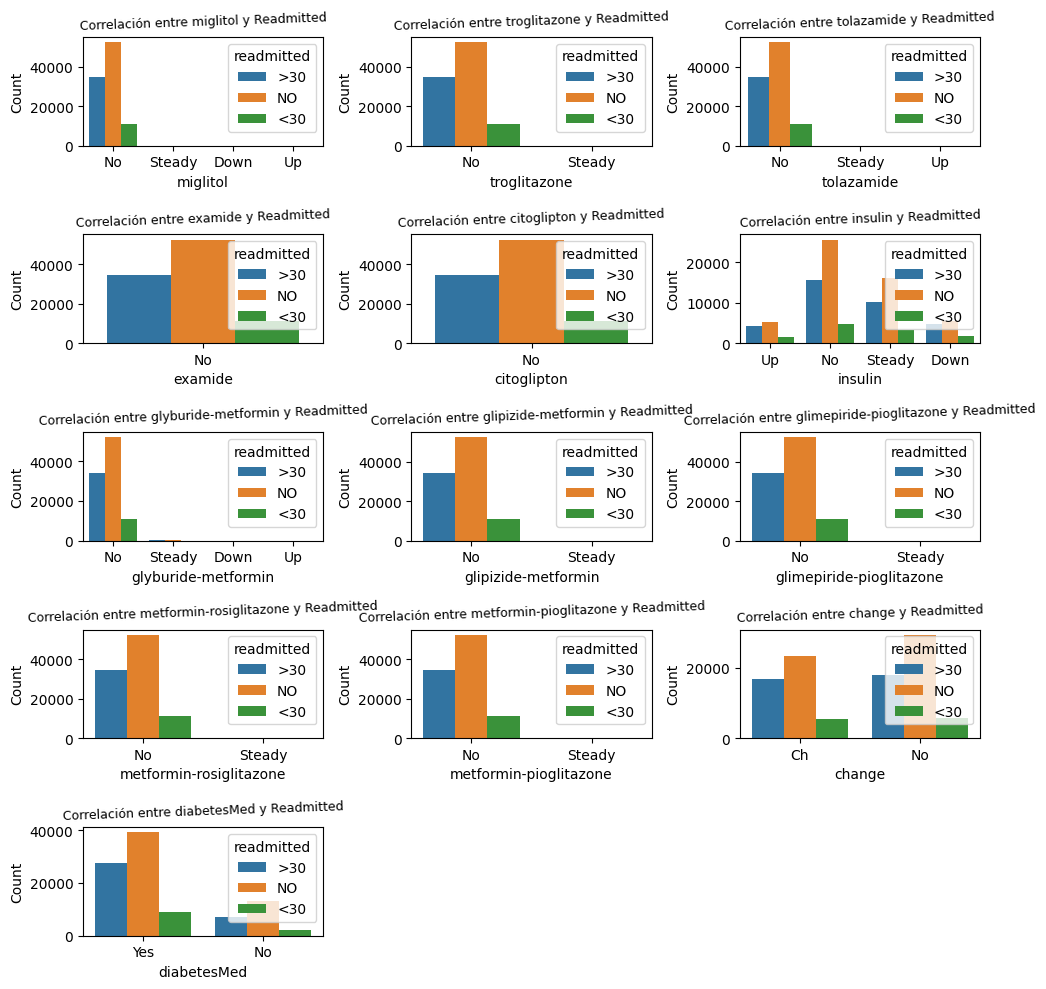

In [656]:
plt.figure(figsize=(10, 10))

for var in var_medicine2:
    plt.subplot(5, 3, var_medicine2.index(var) + 1)
    sns.countplot(x=var, hue='readmitted', data=df_diabetes, dodge=True)
    plt.title(f'Correlación entre {var} y Readmitted', fontsize=9, rotation=2)
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Análisis de la Variable Objetivo

In [657]:
print(len(df_diabetes))

98110


#### Previamente se realizó el mapeo de la variable objetivo de la siguiente forma:

readmitted_mapping = {'NO': 1, '>30': 2, '<30': 3}

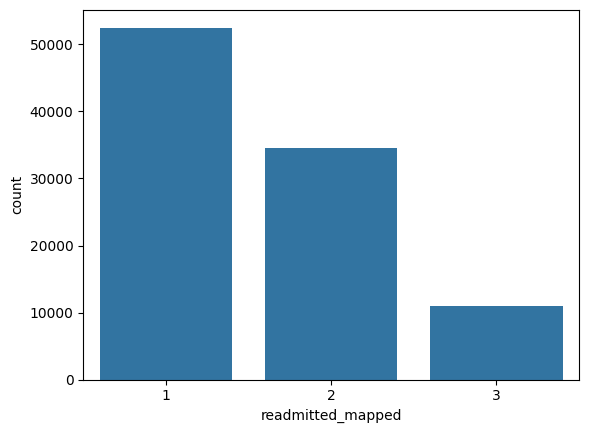

In [658]:
sns.countplot(x='readmitted_mapped', data=df_diabetes)
plt.show()

In [659]:
value_counts_result = df_diabetes['readmitted'].value_counts()
print(value_counts_result)

readmitted
NO     52506
>30    34572
<30    11032
Name: count, dtype: int64


La variable objetivo muestra un desbalance de clases lo cual implica que pueda ser necesario aplicar alguna tecninca de balanceo de clases como SMOTE.

#### SELECCION DE FEATURES

# NO EJECUTAR ESTE CODIGO! SOLO INFO!!!!
0.47 entre "num_medications" y "time_in_hospital"  : en caso de dar de baja, mantener time in hospital SE PRUEBA Y NO MEJORA

ver outliers de diag HECHO

ver null de medicas ID HECHO

In [228]:
var_numericas = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 
                    'number_inpatient', 'number_diagnoses']
var_persona = ['race', 'gender', 'age']
var_medicas = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3']

var_medicine1 = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
                'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose']
var_medicine2 = [ 'miglitol', 'troglitazone', 'tolazamide', 'examide',
                'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

In [660]:
var_persona = ['race', 'gender', 'age']
var_numericas = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                'num_medications', 'number_outpatient', 'number_emergency', 
                'number_inpatient', 'number_diagnoses']
var_medicas = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
var_medicas_diag = ['diag_1', 'diag_2', 'diag_3']
var_medicine1 = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
                'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose']
var_medicine2 = [ 'miglitol', 'troglitazone', 'tolazamide', 'examide',
                'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

var_objetivo = ['readmitted_mapped']

df_features = df_diabetes[var_persona + var_numericas + var_medicas + var_medicas_diag + var_medicine1 + var_medicine2 + var_objetivo ].copy()

df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98110 entries, 1 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98110 non-null  object
 1   gender                    98110 non-null  object
 2   age                       98110 non-null  object
 3   time_in_hospital          98110 non-null  int64 
 4   num_lab_procedures        98110 non-null  int64 
 5   num_procedures            98110 non-null  int64 
 6   num_medications           98110 non-null  int64 
 7   number_outpatient         98110 non-null  int64 
 8   number_emergency          98110 non-null  int64 
 9   number_inpatient          98110 non-null  int64 
 10  number_diagnoses          98110 non-null  int64 
 11  admission_type_id         98110 non-null  int64 
 12  discharge_disposition_id  98110 non-null  int64 
 13  admission_source_id       98110 non-null  int64 
 14  diag_1                    

##### ONE HOT ENCODING

Se aplica One Hot Encoding a las variables relacionadas a las personas.

In [661]:
df_features = pd.get_dummies(df_features, columns=var_persona)

In [662]:
df_features = pd.get_dummies(df_features, columns=var_medicas)

In [663]:
df_features = pd.get_dummies(df_features, columns=var_medicas_diag)

In [664]:
df_features = pd.get_dummies(df_features, columns=var_medicine1)

In [665]:
df_features = pd.get_dummies(df_features, columns=var_medicine2)

In [666]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98110 entries, 1 to 101765
Columns: 1533 entries, time_in_hospital to diabetesMed_Yes
dtypes: bool(1524), int64(9)
memory usage: 152.1 MB


##### STANDARD SCALER

Se aplica standard scaler para manejar una misma escala con todas las variables numericas

In [667]:
scaler = StandardScaler()

df_features[var_numericas] = scaler.fit_transform(df_features[var_numericas])

print(df_features[var_numericas].head())

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
1         -0.475954            0.800484       -0.788827         0.228171   
2         -0.810122           -1.638013        2.126076        -0.387433   
3         -0.810122            0.038454       -0.205847        -0.018071   
4         -1.144289            0.394068       -0.788827        -1.003038   
5         -0.475954           -0.621972        2.709057        -0.018071   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  
1           -0.29238         -0.213654         -0.507693          0.815497  
2            1.27453         -0.213654          0.281598         -0.817250  
3           -0.29238         -0.213654         -0.507693         -0.273001  
4           -0.29238         -0.213654         -0.507693         -1.361499  
5           -0.29238         -0.213654         -0.507693          0.815497  


In [668]:
from sklearn.model_selection import train_test_split

X = df_features.drop('readmitted_mapped', axis=1)
y = df_features['readmitted_mapped']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [669]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf_model_best_params = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)

rf_model_best_params.fit(X_train, y_train)

y_pred_best_params = rf_model_best_params.predict(X_test)

# Calcular probabilidades predichas para AUC-ROC
y_pred_proba = rf_model_best_params.predict_proba(X_test)

# Calcular AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print("Matriz de Confusión (con mejores hiperparámetros):")
print(confusion_matrix(y_test, y_pred_best_params))

print("\nReporte de Clasificación (con mejores hiperparámetros):")
print(classification_report(y_test, y_pred_best_params))

print(f'\nAUC-ROC: {auc_roc:.4f}')

Matriz de Confusión (con mejores hiperparámetros):
[[10492   122     0]
 [ 6487   343     0]
 [ 2051   127     0]]

Reporte de Clasificación (con mejores hiperparámetros):
              precision    recall  f1-score   support

           1       0.55      0.99      0.71     10614
           2       0.58      0.05      0.09      6830
           3       0.00      0.00      0.00      2178

    accuracy                           0.55     19622
   macro avg       0.38      0.35      0.27     19622
weighted avg       0.50      0.55      0.42     19622


AUC-ROC: 0.6637


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [670]:
# Suponiendo que rf_model_best_params es tu modelo entrenado
feature_importances = rf_model_best_params.feature_importances_

# Obtener el número de características no nulas
num_features = sum(feature_importances > 0)

print(f"El modelo RandomForestClassifier tiene {num_features} features.")

El modelo RandomForestClassifier tiene 1136 features.


In [671]:
num_features = 1138

feature_importance = rf_model_best_params.feature_importances_
indices_ordenados = np.argsort(feature_importance)[::-1]
feature_importance_ordenada = feature_importance[indices_ordenados]
nombres_variables = X_train.columns

In [672]:
for i, feature in enumerate(X_train.columns):
    if(i<1139):
        print(f'Característica: {feature} - Importancia: {feature_importance_ordenada[i]}')

Característica: time_in_hospital - Importancia: 0.17115768553165658
Característica: num_lab_procedures - Importancia: 0.06876875059462928
Característica: num_procedures - Importancia: 0.06529548015698859
Característica: num_medications - Importancia: 0.06184356347137166
Característica: number_outpatient - Importancia: 0.049404248784524464
Característica: number_emergency - Importancia: 0.03090492845946535
Característica: number_inpatient - Importancia: 0.026793812514881946
Característica: number_diagnoses - Importancia: 0.019576317265122933
Característica: race_AfricanAmerican - Importancia: 0.017870197077991416
Característica: race_Asian - Importancia: 0.016721514040466224
Característica: race_Caucasian - Importancia: 0.016054603015078744
Característica: race_Hispanic - Importancia: 0.01560142586278551
Característica: race_Other - Importancia: 0.013822394313226986
Característica: gender_Female - Importancia: 0.012794385880212762
Característica: gender_Male - Importancia: 0.01271243184

In [673]:
# Seleccionar las características a mantener (con más del 0.5% de importancia)
features_to_keep = [feature for feature, importance in zip(X_train.columns, feature_importances) if importance >= 0.003]

# Filtrar el conjunto de entrenamiento para incluir solo las características seleccionadas
X_train_filtered = X_train[features_to_keep]

# Filtrar el conjunto de prueba de la misma manera
X_test_filtered = X_test[features_to_keep]

# Crear y entrenar un nuevo modelo RandomForestClassifier con las características filtradas
rf_model_filtered = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)

rf_model_filtered.fit(X_train_filtered, y_train)

# Realizar predicciones en el conjunto de prueba filtrado
y_pred_filtered = rf_model_filtered.predict(X_test_filtered)

# Calcular probabilidades predichas para AUC-ROC en el conjunto de prueba filtrado
y_pred_proba_filtered = rf_model_filtered.predict_proba(X_test_filtered)

# Calcular AUC-ROC en el conjunto de prueba filtrado
auc_roc_filtered = roc_auc_score(y_test, y_pred_proba_filtered, multi_class='ovr')

# Imprimir la matriz de confusión y el informe de clasificación en el conjunto de prueba filtrado
print("Matriz de Confusión (con características filtradas):")
print(confusion_matrix(y_test, y_pred_filtered))

print("\nReporte de Clasificación (con características filtradas):")
print(classification_report(y_test, y_pred_filtered))

print(f'\nAUC-ROC (con características filtradas): {auc_roc_filtered:.4f}')


Matriz de Confusión (con características filtradas):
[[9335 1279    0]
 [4780 2050    0]
 [1421  756    1]]

Reporte de Clasificación (con características filtradas):
              precision    recall  f1-score   support

           1       0.60      0.88      0.71     10614
           2       0.50      0.30      0.38      6830
           3       1.00      0.00      0.00      2178

    accuracy                           0.58     19622
   macro avg       0.70      0.39      0.36     19622
weighted avg       0.61      0.58      0.52     19622


AUC-ROC (con características filtradas): 0.6681


In [674]:
# Suponiendo que rf_model_best_params es tu modelo entrenado
feature_importances = rf_model_filtered.feature_importances_

# Obtener el número de características no nulas
num_features = sum(feature_importances > 0)

print(f"El modelo RandomForestClassifier tiene {num_features} features.")


El modelo RandomForestClassifier tiene 48 features.


In [675]:
num_features = 48

feature_importance = rf_model_filtered.feature_importances_
indices_ordenados = np.argsort(feature_importance)[::-1]
feature_importance_ordenada = feature_importance[indices_ordenados]
nombres_variables = X_train_filtered.columns

In [676]:
for i, feature in enumerate(X_train_filtered.columns):
    if(i<72):
        print(f'Característica: {feature} - Importancia: {feature_importance_ordenada[i]}')

Característica: time_in_hospital - Importancia: 0.2651532403166742
Característica: num_lab_procedures - Importancia: 0.10426134265710597
Característica: num_procedures - Importancia: 0.07563092752523332
Característica: num_medications - Importancia: 0.06302062955893602
Característica: number_outpatient - Importancia: 0.05790225910203953
Característica: number_emergency - Importancia: 0.04807764926874534
Característica: number_inpatient - Importancia: 0.0356543258408774
Característica: number_diagnoses - Importancia: 0.02666322801981023
Característica: age_[70-80) - Importancia: 0.025521385943748944
Característica: age_[80-90) - Importancia: 0.024263706501161383
Característica: age_[90-100) - Importancia: 0.01919988773515963
Característica: admission_type_id_1 - Importancia: 0.014513369444888673
Característica: admission_type_id_3 - Importancia: 0.014200266662107974
Característica: admission_type_id_6 - Importancia: 0.011952193839069418
Característica: discharge_disposition_id_1 - Impor

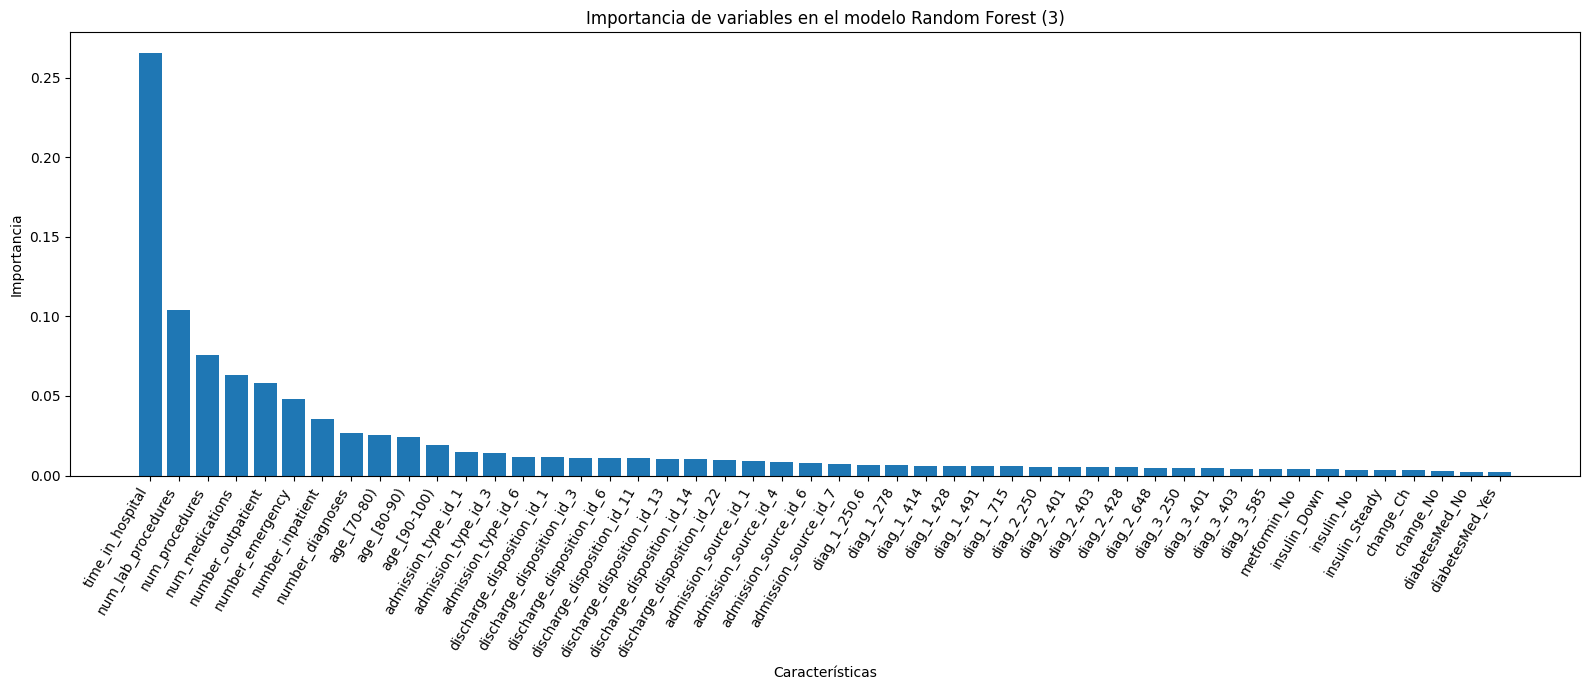

In [677]:
plt.figure(figsize=(16, 7))
plt.bar(range(len(nombres_variables)), feature_importance_ordenada)
plt.xticks(range(len(nombres_variables)), nombres_variables, rotation=60, ha='right')
plt.title('Importancia de variables en el modelo Random Forest (3)')
plt.xlabel('Características')
plt.ylabel('Importancia')

plt.tight_layout()
plt.show()

*****************
------------------
****************

In [397]:
rf_model_weighted = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    random_state=42,
    class_weight='balanced'  # Ajustar pesos de clase automáticamente
)

rf_model_weighted.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_weighted = rf_model_weighted.predict(X_test)

# Calcular AUC-ROC
y_pred_proba_weighted = rf_model_weighted.predict_proba(X_test)
auc_roc_weighted = roc_auc_score(y_test, y_pred_proba_weighted, multi_class='ovr')

# Imprimir métricas de rendimiento
print("Matriz de Confusión (con pesos de clase):")
print(confusion_matrix(y_test, y_pred_weighted))

print("\nReporte de Clasificación (con pesos de clase):")
print(classification_report(y_test, y_pred_weighted))

print(f'\nAUC-ROC (con pesos de clase): {auc_roc_weighted:.4f}')



Matriz de Confusión (con pesos de clase):
[[6903 1927 1908]
 [2833 2174 1990]
 [ 758  542  971]]

Reporte de Clasificación (con pesos de clase):
              precision    recall  f1-score   support

           1       0.66      0.64      0.65     10738
           2       0.47      0.31      0.37      6997
           3       0.20      0.43      0.27      2271

    accuracy                           0.50     20006
   macro avg       0.44      0.46      0.43     20006
weighted avg       0.54      0.50      0.51     20006


AUC-ROC (con pesos de clase): 0.6629


In [398]:
from imblearn.under_sampling import RandomUnderSampler

# Crear el objeto RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Aplicar submuestreo a los conjuntos de entrenamiento
X_train_undersampled, y_train_undersampled = under_sampler.fit_resample(X_train, y_train)

# Entrenar el modelo con el conjunto de entrenamiento submuestreado
rf_model_undersampled = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)

rf_model_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predecir en el conjunto de prueba
y_pred_undersampled = rf_model_undersampled.predict(X_test)

# Calcular AUC-ROC
y_pred_proba_undersampled = rf_model_undersampled.predict_proba(X_test)
auc_roc_undersampled = roc_auc_score(y_test, y_pred_proba_undersampled, multi_class='ovr')

# Imprimir métricas de rendimiento
print("Matriz de Confusión (con submuestreo):")
print(confusion_matrix(y_test, y_pred_undersampled))

print("\nReporte de Clasificación (con submuestreo):")
print(classification_report(y_test, y_pred_undersampled))

print(f'\nAUC-ROC (con submuestreo): {auc_roc_undersampled:.4f}')


Matriz de Confusión (con submuestreo):
[[6609 1859 2270]
 [2702 1983 2312]
 [ 712  495 1064]]

Reporte de Clasificación (con submuestreo):
              precision    recall  f1-score   support

           1       0.66      0.62      0.64     10738
           2       0.46      0.28      0.35      6997
           3       0.19      0.47      0.27      2271

    accuracy                           0.48     20006
   macro avg       0.44      0.46      0.42     20006
weighted avg       0.54      0.48      0.49     20006


AUC-ROC (con submuestreo): 0.6606


In [399]:
from imblearn.over_sampling import SMOTE

# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar sobremuestreo a los conjuntos de entrenamiento
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo con el conjunto de entrenamiento sobremuestreado
rf_model_oversampled = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)

rf_model_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Predecir en el conjunto de prueba
y_pred_oversampled = rf_model_oversampled.predict(X_test)

# Calcular AUC-ROC
y_pred_proba_oversampled = rf_model_oversampled.predict_proba(X_test)
auc_roc_oversampled = roc_auc_score(y_test, y_pred_proba_oversampled, multi_class='ovr')

# Imprimir métricas de rendimiento
print("Matriz de Confusión (con sobremuestreo):")
print(confusion_matrix(y_test, y_pred_oversampled))

print("\nReporte de Clasificación (con sobremuestreo):")
print(classification_report(y_test, y_pred_oversampled))

print(f'\nAUC-ROC (con sobremuestreo): {auc_roc_oversampled:.4f}')


Matriz de Confusión (con sobremuestreo):
[[7824 1986  928]
 [3459 2428 1110]
 [1001  672  598]]

Reporte de Clasificación (con sobremuestreo):
              precision    recall  f1-score   support

           1       0.64      0.73      0.68     10738
           2       0.48      0.35      0.40      6997
           3       0.23      0.26      0.24      2271

    accuracy                           0.54     20006
   macro avg       0.45      0.45      0.44     20006
weighted avg       0.53      0.54      0.53     20006


AUC-ROC (con sobremuestreo): 0.6559


In [401]:
from sklearn.ensemble import GradientBoostingClassifier

# Definir el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    random_state=42
)

# Entrenar el modelo en el conjunto de entrenamiento
gb_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_gb = gb_model.predict(X_test)

# Calcular AUC-ROC
y_pred_proba_gb = gb_model.predict_proba(X_test)
auc_roc_gb = roc_auc_score(y_test, y_pred_proba_gb, multi_class='ovr')

# Imprimir métricas de rendimiento
print("Matriz de Confusión (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_gb))

print("\nReporte de Clasificación (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

print(f'\nAUC-ROC (Gradient Boosting): {auc_roc_gb:.4f}')


Matriz de Confusión (Gradient Boosting):
[[8759 1885   94]
 [4169 2700  128]
 [1310  841  120]]

Reporte de Clasificación (Gradient Boosting):
              precision    recall  f1-score   support

           1       0.62      0.82      0.70     10738
           2       0.50      0.39      0.43      6997
           3       0.35      0.05      0.09      2271

    accuracy                           0.58     20006
   macro avg       0.49      0.42      0.41     20006
weighted avg       0.54      0.58      0.54     20006


AUC-ROC (Gradient Boosting): 0.6567


In [402]:
from sklearn.svm import SVC

# Definir el modelo SVM con kernel balanceado
svm_model = SVC(
    kernel='rbf',
    class_weight='balanced',
    random_state=42
)

# Entrenar el modelo en el conjunto de entrenamiento
svm_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Imprimir métricas de rendimiento
print("Matriz de Confusión (SVM con kernel balanceado):")
print(confusion_matrix(y_test, y_pred_svm))

print("\nReporte de Clasificación (SVM con kernel balanceado):")
print(classification_report(y_test, y_pred_svm))


Matriz de Confusión (SVM con kernel balanceado):
[[6421 2503 1814]
 [2473 2797 1727]
 [ 670  699  902]]

Reporte de Clasificación (SVM con kernel balanceado):
              precision    recall  f1-score   support

           1       0.67      0.60      0.63     10738
           2       0.47      0.40      0.43      6997
           3       0.20      0.40      0.27      2271

    accuracy                           0.51     20006
   macro avg       0.45      0.46      0.44     20006
weighted avg       0.55      0.51      0.52     20006



In [404]:
print("Distribución de clases en el conjunto de prueba:")
print(y_test.value_counts())

Distribución de clases en el conjunto de prueba:
readmitted_mapped
1    10738
2     6997
3     2271
Name: count, dtype: int64


In [407]:
from imblearn.over_sampling import SMOTE

# Calcular la proporción de clases original
class_counts = y_train.value_counts()

# Definir el objetivo de sobremuestreo como un porcentaje de la clase mayoritaria
desired_percentage_of_majority = 1.0  # Puedes ajustar este valor según tus necesidades

# Calcular el número de instancias que deberían tener las clases minoritarias
desired_count_for_minorities = (class_counts.max() * desired_percentage_of_majority).astype(int)

# Crear el objeto SMOTE con el objetivo de sobremuestreo para las clases minoritarias
smote_minority = SMOTE(sampling_strategy={2: desired_count_for_minorities, 3: desired_count_for_minorities}, random_state=42)

# Aplicar sobremuestreo solo a la clase minoritaria en los conjuntos de entrenamiento
X_train_oversampled_minority, y_train_oversampled_minority = smote_minority.fit_resample(X_train, y_train)


In [408]:
rf_model_weighted = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    random_state=42,
    class_weight='balanced'  # Ajustar pesos de clase automáticamente
)

rf_model_weighted.fit(X_train_oversampled_minority, y_train_oversampled_minority)

# Predecir en el conjunto de prueba
y_pred_weighted = rf_model_weighted.predict(X_test)

# Calcular AUC-ROC
y_pred_proba_weighted = rf_model_weighted.predict_proba(X_test)
auc_roc_weighted = roc_auc_score(y_test, y_pred_proba_weighted, multi_class='ovr')

# Imprimir métricas de rendimiento
print("Matriz de Confusión (con pesos de clase):")
print(confusion_matrix(y_test, y_pred_weighted))

print("\nReporte de Clasificación (con pesos de clase):")
print(classification_report(y_test, y_pred_weighted))

print(f'\nAUC-ROC (con pesos de clase): {auc_roc_weighted:.4f}')

Matriz de Confusión (con pesos de clase):
[[7824 1986  928]
 [3459 2428 1110]
 [1001  672  598]]

Reporte de Clasificación (con pesos de clase):
              precision    recall  f1-score   support

           1       0.64      0.73      0.68     10738
           2       0.48      0.35      0.40      6997
           3       0.23      0.26      0.24      2271

    accuracy                           0.54     20006
   macro avg       0.45      0.45      0.44     20006
weighted avg       0.53      0.54      0.53     20006


AUC-ROC (con pesos de clase): 0.6559


In [411]:
class_weights_manual = {1: 0.34, 2: 0.33, 3: 0.33}

# Crear el modelo con pesos de clase manuales
rf_model_manual_weights = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    random_state=42,
    class_weight=class_weights_manual
)

# Entrenar el modelo en los conjuntos de entrenamiento con pesos de clase manuales
rf_model_manual_weights.fit(X_train_oversampled_minority, y_train_oversampled_minority)

y_pred_proba_weighted = rf_model_manual_weights.predict_proba(X_test)
auc_roc_weighted = roc_auc_score(y_test, y_pred_proba_weighted, multi_class='ovr')

print("Matriz de Confusión (con pesos de clase):")
print(confusion_matrix(y_test, y_pred_weighted))

print("\nReporte de Clasificación (con pesos de clase):")
print(classification_report(y_test, y_pred_weighted))

print(f'\nAUC-ROC (con pesos de clase): {auc_roc_weighted:.4f}')

Matriz de Confusión (con pesos de clase):
[[7824 1986  928]
 [3459 2428 1110]
 [1001  672  598]]

Reporte de Clasificación (con pesos de clase):
              precision    recall  f1-score   support

           1       0.64      0.73      0.68     10738
           2       0.48      0.35      0.40      6997
           3       0.23      0.26      0.24      2271

    accuracy                           0.54     20006
   macro avg       0.45      0.45      0.44     20006
weighted avg       0.53      0.54      0.53     20006


AUC-ROC (con pesos de clase): 0.6567


-------------------------------
-------------------------------


----------------------------------
---------------------------------